In [127]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import data_visualization as dv
from copy import deepcopy
import time
from pathlib import Path
import pandas as pd
import glob
from IPython.display import display

import read_data_functions as rdf
import plot_functions as pf
from Optimal_Stopping_Object import ModelConstructor
from initializer import InitialThangs
import loss_functions as lf
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Inputs

---
1. Switch Delay
2. Reward weighting
3. Altered SD 

        - Agent SD
        - Movement SD
        - Reaction SD
        - Gamble SD

---
NOTE: I'm using the data for guess sd. Haven't been able to really fit this with realistic parameters of the model. 

- This is likely due to people's intended decision time changing, whereas in the model, it is all around a single decision time
---

# Select Exp1 or Exp2


In [128]:
EXPERIMENT = "Exp2"

# Initial Thangs


In [129]:
plt.style.use("cashaback_dark")
wheel = dv.ColorWheel()

# Get path and save path 
LOAD_PATH = Path(f"D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{EXPERIMENT}")
SAVE_PATH = f"D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{EXPERIMENT}\\Figures\\"
it = InitialThangs(EXPERIMENT)

# Pickle Data


In [130]:
if "group" not in locals():
    group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
else:
    if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
        group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")
    
model_path = Path(f'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\results\\{EXPERIMENT}\\models')

model_description_dfs = list(model_path.glob(f"{EXPERIMENT}_model_descriptions*"))
model_parameter_dfs = list(model_path.glob(f"{EXPERIMENT}_model_parameters*"))

# with open(model_path / 'exp1_model_table.pkl', 'rb') as f:
#     model_df = dill.load(f)

# Overall Analysis of Models

## Get models

In [131]:
df_description = pd.read_pickle(model_description_dfs[-1])
df = pd.read_pickle(model_parameter_dfs[-1])

## Calculate number of unknown parameters and  BIC

In [132]:
# Count the number of unknowns/alterations were made to the model
df['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
n = group.exp_info.num_subjects
df['BIC'] = n*np.log(df['Loss']/n) + df['Parameters']*np.log(n)
df

,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess,Parameters,BIC
0,model0_2023_09_14_10_19_15,8.675204,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[27.084424289731288]]]","[[[28.964409788238868]], [[14.482204894119434]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[30]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,4,-11.709824
1,model1_2023_09_14_10_19_15,7.103591,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[27.084424289731288]]]","[[[28.964409788238868]], [[14.482204894119434]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[30]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,5,-13.328614
2,model2_2023_09_14_10_19_15,7.579216,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[27.084424289731288]]]","[[[28.964409788238868]], [[14.482204894119434]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[0]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,5,-11.773188
3,model3_2023_09_14_10_19_15,7.005199,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[27.084424289731288]]]","[[[28.964409788238868]], [[14.482204894119434]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[0]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,6,-10.485308
4,model4_2023_09_14_10_19_15,8.318014,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[27.084424289731288]]]","[[[28.964409788238868]], [[14.482204894119434]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[30]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[0]]]","[[[50]], [[50]]]","[[[115]], [[50]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,5,-9.540859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,model123_2023_09_14_10_19_32,8.1132

In [133]:
# Count the number of unknowns/alterations were made to the model
df_description['Parameters'] = np.where(df_description.isin([False,'Less','Greater']),1,0).sum(axis=1)
n = group.exp_info.num_subjects
df_description['BIC'] = n*np.log(df_description['Loss']/n) + df_description['Parameters']*np.log(n)
df_description

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
0,model0_2023_09_14_10_19_15,8.675204,True,True,False,False,False,False,Normal,Normal,Normal,4,-11.709824
1,model1_2023_09_14_10_19_15,7.103591,True,True,False,False,False,False,Normal,Less,Normal,5,-13.328614
2,model2_2023_09_14_10_19_15,7.579216,True,False,False,False,False,False,Normal,Normal,Normal,5,-11.773188
3,model3_2023_09_14_10_19_15,7.005199,True,False,False,False,False,False,Normal,Less,Normal,6,-10.485308
4,model4_2023_09_14_10_19_15,8.318014,False,True,False,False,False,False,Normal,Normal,Normal,5,-9.540859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,model123_2023_09_14_10_19_32,8.113267,True,False,True,True,True,True,Normal,Less,Normal,2,-19.673169
124,model124_2023_09_14_10_19_32,10.145012,False,True,True,True,True,True,Normal,Normal,Normal,1,-17.487666
125,model125_2023_09_14_10_19_32,7.751374,False,True,True,True,True,True,Normal,Less,Normal,2,-20.768301
126,model126_2023_09_14_10_19_32,10.090781,False,False,True,True,True,True,Normal,Normal,Normal,2,-14.438250


## Calculate some paramter effectiveness metrics

### Mean loss for that parameter

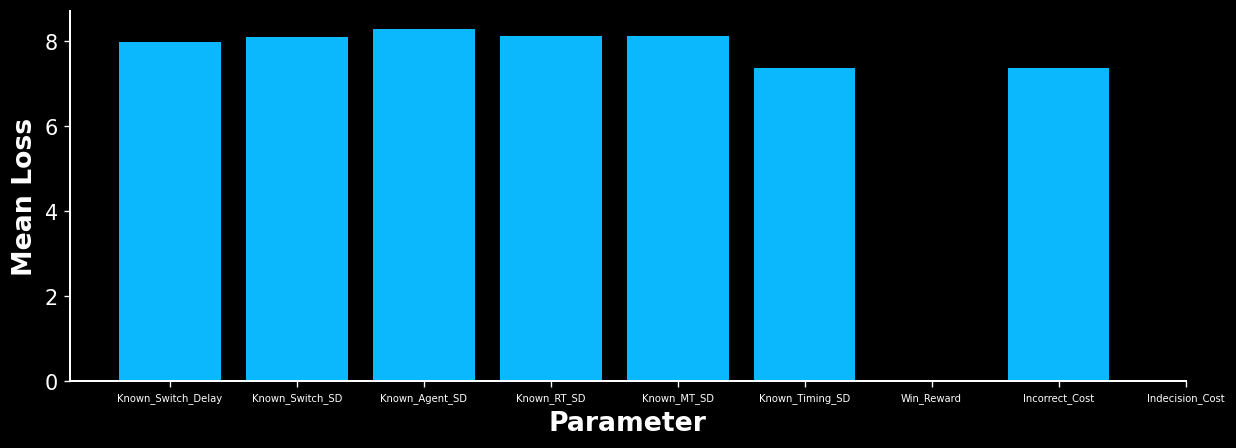

In [134]:
# Get the mean loss when that parameter is False
parameter_mean_loss = {}
for col in df_description.columns[2:11]: # Skipping 'Model', "Loss", "Parameters"
    if col in ['Win_Reward', 'Incorrect_Cost', 'Indecision_Cost']:
        dff = df_description[df_description[col].isin(['Less','Greater'])]
        parameter_mean_loss.update({col:dff['Loss'].mean()})
    else:
        dff = df_description[df_description[col] == False]
        parameter_mean_loss.update({col:dff['Loss'].mean()})
        
num_params = len(parameter_mean_loss.values())
xlocs = np.arange(0,num_params,1)
fig,ax = plt.subplots(dpi=120,figsize=(12,4))
ax.bar(xlocs, parameter_mean_loss.values()) 
ax.set_xticks(xlocs)
ax.set_xticklabels(parameter_mean_loss.keys(), fontsize=6)
ax.set_xlabel('Parameter')
ax.set_ylabel('Mean Loss')
plt.show()

### Mean difference when that parameter is known versus unknown

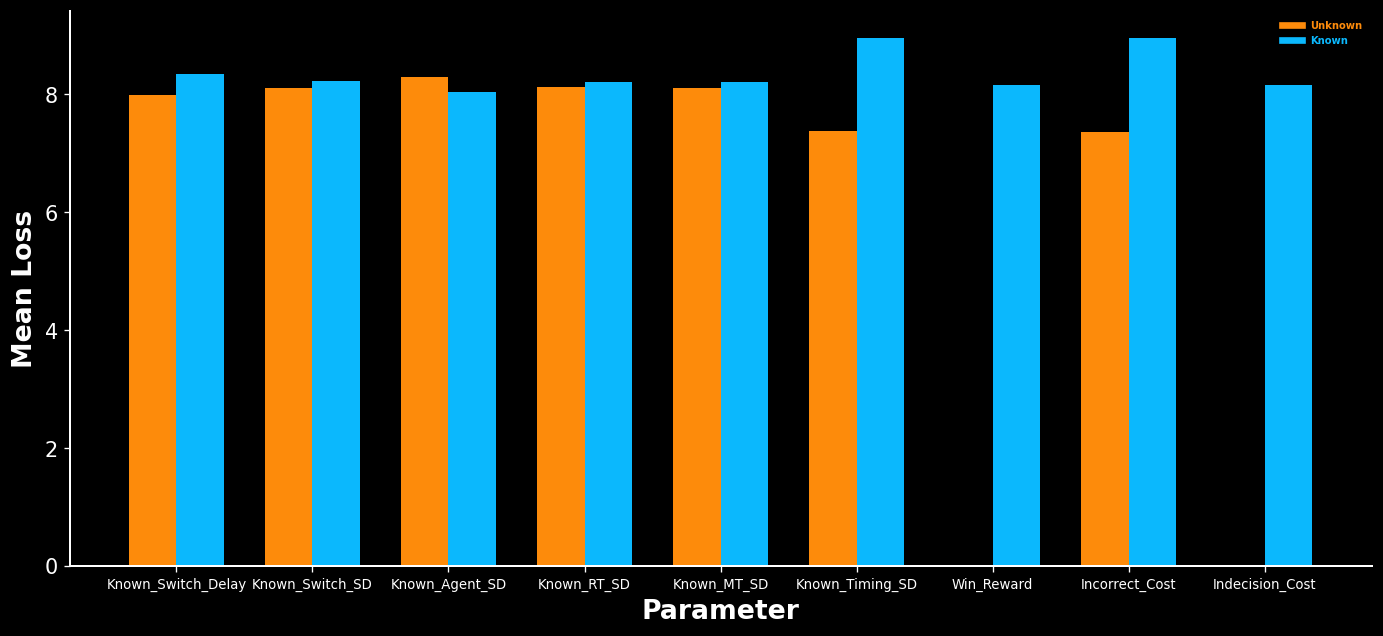

In [135]:
parameter_mean_loss_known = {}
parameter_mean_loss_unknown = {}
for col in df_description.columns[2:11]: # Skipping 'Model', "Loss", "Parameters"
    if col in ['Win_Reward', 'Incorrect_Cost', 'Indecision_Cost']:
        dff_unknown = df_description[df_description[col].isin(['Less','Greater'])]
        parameter_mean_loss_unknown.update({col:dff_unknown['Loss'].mean()})
        dff_known = df_description[df_description[col].isin(['Normal'])]
        parameter_mean_loss_known.update({col:dff_known['Loss'].mean()})
    else:
        dff_unknown = df_description[df_description[col] == False]
        parameter_mean_loss_unknown.update({col:dff_unknown['Loss'].mean()})
        dff_known = df_description[df_description[col] == True]
        parameter_mean_loss_known.update({col:dff_known['Loss'].mean()})
        
num_params = len(parameter_mean_loss_known.values())
xlocs = np.arange(0,num_params,1)
w,h = 14,6
bar_width = w*0.025
fig,ax = plt.subplots(dpi=120,figsize=(w,h))
ax.bar(xlocs+(0.5*bar_width), parameter_mean_loss_known.values(), width=bar_width, color=wheel.rak_blue) 
ax.bar(xlocs-(0.5*bar_width), parameter_mean_loss_unknown.values(),width=bar_width, color=wheel.rak_orange) 
ax.set_xticks(xlocs)
ax.set_xticklabels(parameter_mean_loss.keys(), fontsize=8)
ax.set_xlabel('Parameter')
ax.set_ylabel('Mean Loss')
dv.custom_legend(ax,['Unknown', 'Known'], [wheel.rak_orange, wheel.rak_blue])
plt.show()

## Filter out Models

Minimal Loss Models|

In [136]:
num_best_models = 5
best_models_df = df.nsmallest(num_best_models,'Loss')
best_models_description = df_description.nsmallest(num_best_models,'Loss')
best_models_description


,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
65,model65_2023_09_14_10_19_24,6.246988,True,True,True,False,False,False,Normal,Less,Normal,4,-19.590690
67,model67_2023_09_14_10_19_24,6.246988,True,False,True,False,False,False,Normal,Less,Normal,5,-16.412637
69,model69_2023_09_14_10_19_24,6.246988,False,True,True,False,False,False,Normal,Less,Normal,5,-16.412637
71,model71_2023_09_14_10_19_24,6.246988,False,False,True,False,False,False,Normal,Less,Normal,6,-13.234583
83,model83_2023_09_14_10_19_26,6.282272,True,False,True,False,True,False,Normal,Less,Normal,4,-19.455516


Minimal BIC Models

In [137]:
best_models_bic_df = df.nsmallest(5,'BIC')
best_models_bic_df_description = df_description.nsmallest(5,'BIC')
best_models_bic_df_description

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
113,model113_2023_09_14_10_19_30,6.409494,True,True,True,True,True,False,Normal,Less,Normal,2,-25.330455
112,model112_2023_09_14_10_19_30,7.748766,True,True,True,True,True,False,Normal,Normal,Normal,1,-23.954432
81,model81_2023_09_14_10_19_26,6.329736,True,True,True,False,True,False,Normal,Less,Normal,3,-22.452926
97,model97_2023_09_14_10_19_28,6.355058,True,True,True,True,False,False,Normal,Less,Normal,3,-22.357106
117,model117_2023_09_14_10_19_31,6.358582,False,True,True,True,True,False,Normal,Less,Normal,3,-22.343800


Single Parameter Models

In [148]:
mask = 'Parameters == 1'
single_parameter_models = df.query(mask)
single_parameter_models_description = df_description.query(mask)
display(single_parameter_models_description)
display(single_parameter_models)

,Model,Loss,Known_Switch_Delay,Known_Switch_SD,Known_Agent_SD,Known_RT_SD,Known_MT_SD,Known_Timing_SD,Win_Reward,Incorrect_Cost,Indecision_Cost,Parameters,BIC
120,model120_2023_09_14_10_19_31,10.604946,True,True,True,True,True,True,Normal,Normal,Normal,0,-19.6016


,Model,Loss,experiment,num_blocks,agent_means,agent_sds,nsteps,num_timesteps,expected,key,reaction_sd,movement_sd,timing_sd,guess_switch_sd,guess_sd,reaction_time,movement_time,guess_switch_delay,electromechanical_delay,guess_delay,win_reward,incorrect_cost,indecision_cost,prob_selecting_correct_target_reaction,prob_selecting_correct_target_guess,Parameters,BIC
120,model120_2023_09_14_10_19_31,10.604946,Exp2,4,"[[[1098.8922142664594], [1099.030938911438], [...","[[[49.04981789793876], [50.37975115650871], [4...",1,1800,True,1,"[[[54.168848579462576]], [[54.168848579462576]]]","[[[28.964409788238868]], [[28.964409788238868]]]","[[[63.04908405908785], [63.04908405908785], [6...","[[[30]], [[30]]]","[[[69.82253934575802], [69.82253934575802], [6...","[[[264.559829711914]], [[264.559829711914]]]","[[[160.25]], [[160.25]]]","[[[65]], [[65]]]","[[[50]], [[50]]]","[[[115]], [[115]]]","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,0.5,0,-19.6016


In [149]:
models = {}
for index,row in single_parameter_models.iterrows():
    model  = ModelConstructor(
                        experiment=EXPERIMENT,
                        num_blocks=row.num_blocks,
                        num_timesteps=1800,
                        agent_means=row.agent_means,
                        agent_sds=row.agent_sds, #!
                        reaction_time=row.reaction_time,
                        movement_time=row.movement_time,
                        reaction_sd=row.reaction_sd, #! Reducing these, aka the particiapnt thinks they are more certain than they are
                        movement_sd=row.movement_sd,
                        timing_sd=row.timing_sd,
                        guess_switch_delay=row.guess_switch_delay, # Designed like this for broadcasting reasons
                        guess_switch_sd=row.guess_switch_sd, # This includes electromechanical delay sd and timing sd bc it's straight from data
                        electromechanical_delay=row.electromechanical_delay,
                        switch_cost_exists=True,
                        expected=True,
                        win_reward=row.win_reward,
                        incorrect_cost=row.incorrect_cost,
                        indecision_cost=row.indecision_cost,
                    )
    models.update({row['Model']:model})

# Plots

In [150]:
# line_colors = [wheel.purple, wheel.white, wheel.rak_blue, wheel.rak_orange, wheel.pink]
save = False

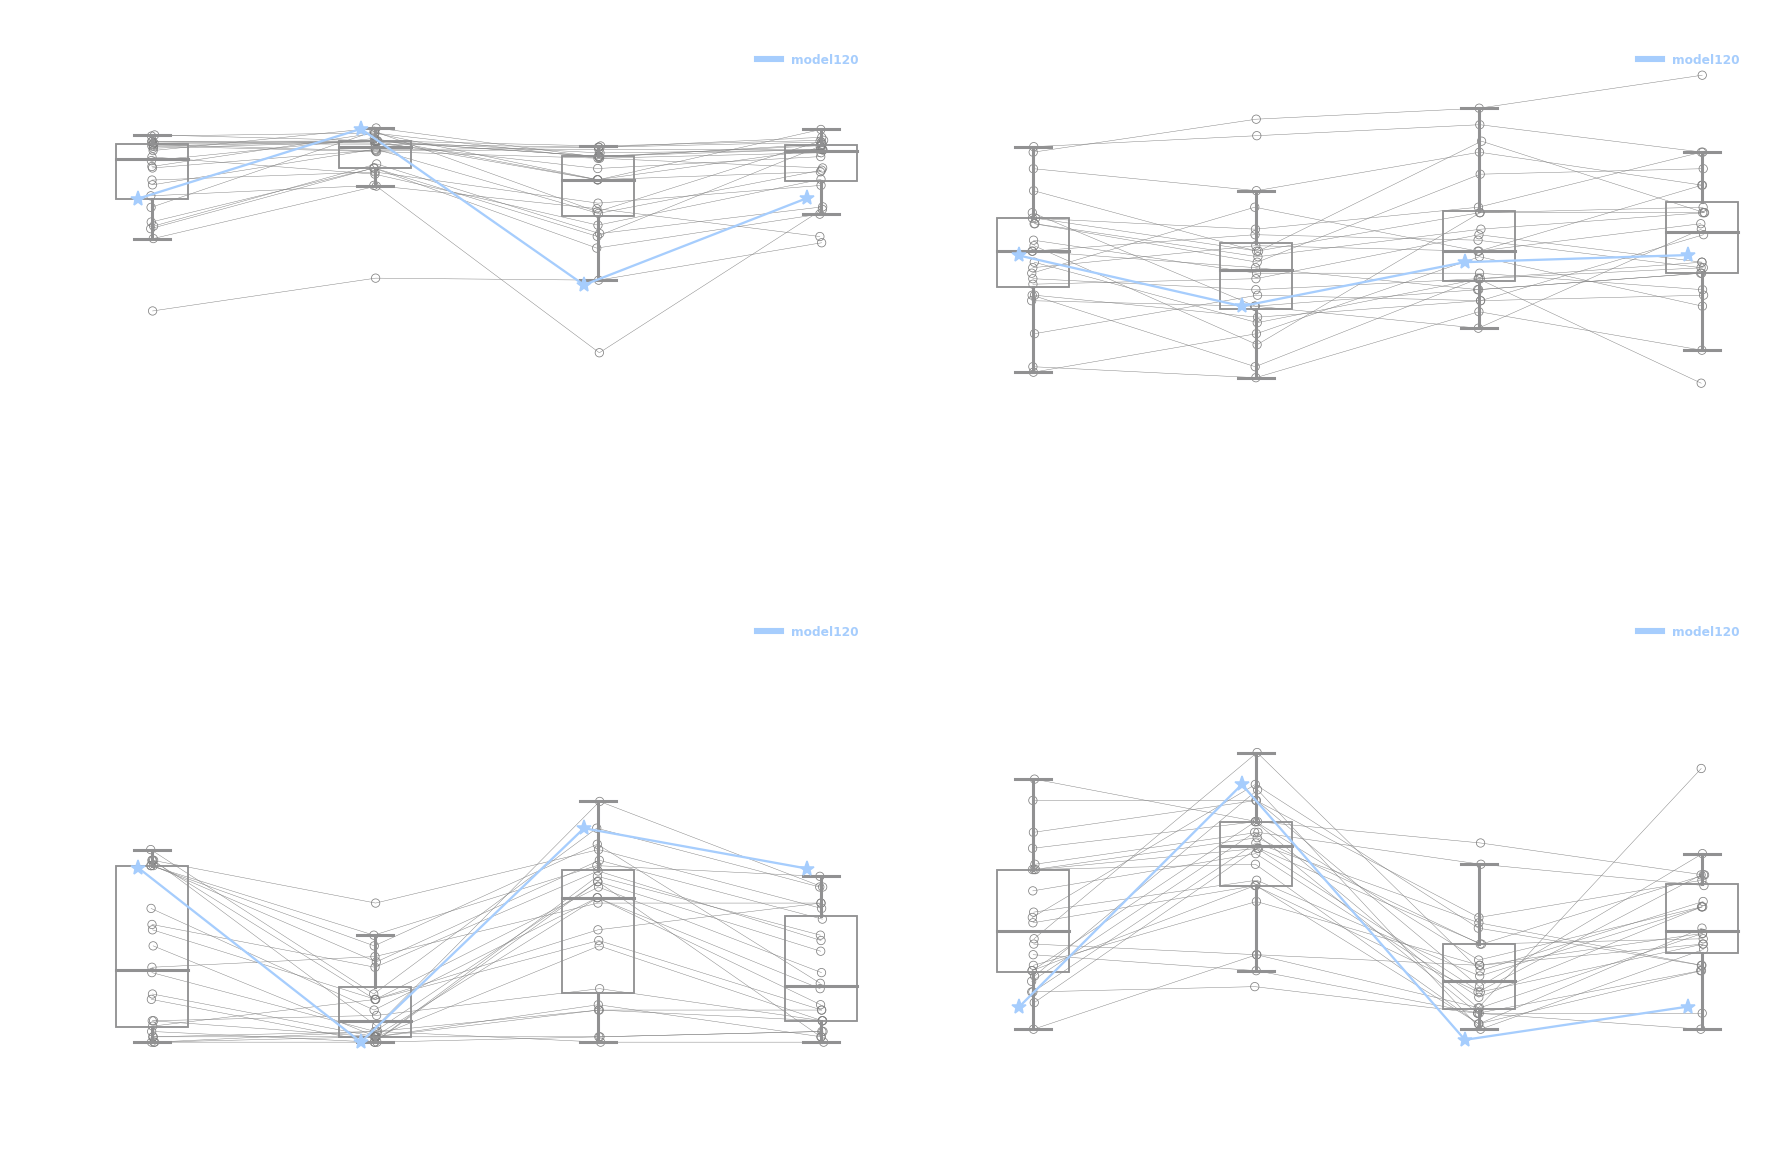

In [154]:
w,h = 16,10

mult_w, div_w = 0.053,2.3
div_h = 2.5
xlocs = np.linspace(0, w/div_w, num=len(it.trial_block_titles))
legend_fontsize = 8

metrics = [np.nanmedian(group.movement_metrics.movement_onset_times('task'), axis=2),
            group.score_metrics.score_metric('wins')/group.exp_info.num_task_trials*100,
            group.score_metrics.score_metric('incorrects')/group.exp_info.num_task_trials*100,
            group.score_metrics.score_metric('indecisions')/group.exp_info.num_task_trials*100
            ]
ylocs = [np.arange(400, 1601, 200)] + [np.arange(0, 101, 25)]*3
ylabels = ['Time (ms)', 'Wins (%)','Incorrects (%)','Indecisions (%)']
titles = ['Median Movement Onset Time', 'Wins', 'Incorrects', 'Indecisions']
model_labels = [name.split('_')[0] for name in models.keys()] # Get the model names, only up to the number, ignore date

fig = dv.Figure(figsize=(w,h),dpi=110)
ax1 = fig.add_panel(dim=(w*mult_w,    0.0, w/div_w, h/div_h))
ax2 = fig.add_panel(dim=(w/div_w+1.9, 0.0, w/div_w, h/div_h))
ax3 = fig.add_panel(dim=(w*mult_w,    5.2, w/div_w, h/div_h))
ax4 = fig.add_panel(dim=(w/div_w+1.9, 5.2, w/div_w, h/div_h))
axs = [ax1,ax2,ax3,ax4]
model_data = [[model.results.get_metric(model.player_behavior.wtd_leave_time,metric_type='true',decision_type='optimal') for model in models.values()],
             [model.results.get_metric(model.score_metrics.prob_incorrect,metric_type='true',decision_type='optimal')*100 for model in models.values()],
            [model.results.get_metric(model.score_metrics.prob_indecision,metric_type='true',decision_type='optimal')*100 for model in models.values()]
            ]

for j in range(len(model_data)):
    pf.multiple_models_boxplot_v2(
        ax=axs[j],
        data=metrics[j],
        model_data=model_data[j],
        labels=model_labels,
        show_boxplot=True,
        colors=wheel.grey,
        linestyles=None,
        line_colors = None,
        xlocs=xlocs,
        ylocs=ylocs[j],
        xticklabels=it.trial_block_titles,
        xlabel=it.xlabel,
        ylabel=ylabels[j],
        title=titles[j],
        legend_fontsize=legend_fontsize,
        title_fontsize=20
    )
fig.remove_figure_borders()
# plt.suptitle(suptitles[i], y=1.1, fontsize = 30)

In [152]:
model_data

[[array([1173.28495043, 1363.59076862,  938.08359651, 1174.70071528])],
 [array([51.52563977, 39.99669956, 50.00943941, 51.62232492])],
 [array([40.78713153,  0.        , 49.9866829 , 40.56611807])],
 [array([7.68722870e+00, 6.00033004e+01, 3.87768815e-03, 7.81155702e+00])]]